In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
df =pd.read_csv("../Dataset/breast-cancer.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
df.shape

(569, 32)

In [7]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [8]:
df['diagnosis']=df['diagnosis'].map({'B':1,'M':0})

In [9]:
df = df.drop('id',axis=1)

In [10]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
X=df.drop('diagnosis',axis=1)

In [12]:
y=df['diagnosis']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix

In [19]:
accuracy = []
estimate = []
for i in range(1,1000,10):
    rfc= RandomForestClassifier(n_estimators=i,bootstrap=True)
    rfc.fit(X_train,y_train)
    preds = rfc.predict(X_test)
    ac = accuracy_score(y_test,preds)
    accuracy.append(ac)
    estimate.append(i)

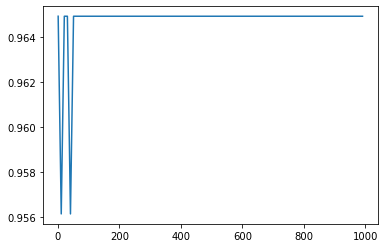

In [21]:
plt.plot(estimate,accuracy)

In [22]:
from sklearn.model_selection import GridSearchCV

In [27]:
params_grid = {'n_estimators':[1,2,3,4,5,6,7,8,9,10,15,20,30],'bootstrap':[True,False]}

In [28]:
rfc= RandomForestClassifier()

In [29]:
grid = GridSearchCV(rfc,param_grid=params_grid,cv=5)

In [30]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20,
                                          30]})

In [31]:
grid.best_params_

{'bootstrap': True, 'n_estimators': 5}

In [32]:
rfc = RandomForestClassifier(n_estimators=5,bootstrap=True)

In [33]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5)

In [34]:
preds = rfc.predict(X_test)

In [35]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        43
           1       0.95      0.97      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [38]:
confusion_matrix(y_test,preds)

array([[39,  4],
       [ 2, 69]], dtype=int64)

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


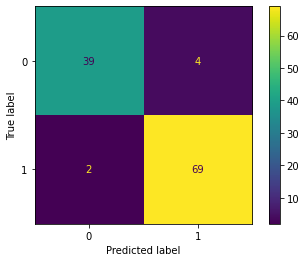

In [42]:
plot_confusion_matrix(rfc,X_test,y_test)

In [43]:
accuracy_score(y_test,preds)

0.9473684210526315

In [40]:
breast_modal = RandomForestClassifier(n_estimators=5,bootstrap=True)

In [41]:
breast_modal.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5)

In [44]:
import pickle

In [45]:
pickle.dump(breast_modal,open("breast_modal.pkl",'wb'))

In [46]:
X.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [47]:
pickle.dump(list(X.columns),open('column_names_breast.pkl','wb'))

In [48]:
col_names = pickle.load(open('column_names_breast.pkl','rb'))

In [49]:
col_names

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [50]:
loaded_model = pickle.load(open('breast_modal.pkl','rb'))

In [51]:
df.sample(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
354,1,11.140,14.07,71.24,384.6,0.07274,0.06064,0.04505,0.01471,0.1690,...,12.12,15.82,79.62,453.5,0.08864,0.1256,0.12010,0.03922,0.2576,0.07018
92,1,13.270,14.76,84.74,551.7,0.07355,0.05055,0.03261,0.02648,0.1386,...,16.36,22.35,104.50,830.6,0.10060,0.1238,0.13500,0.10010,0.2027,0.06206
250,0,20.940,23.56,138.90,1364.0,0.10070,0.16060,0.27120,0.13100,0.2205,...,25.58,27.00,165.30,2010.0,0.12110,0.3172,0.69910,0.21050,0.3126,0.07849
524,1,9.847,15.68,63.00,293.2,0.09492,0.08419,0.02330,0.02416,0.1387,...,11.24,22.99,74.32,376.5,0.14190,0.2243,0.08434,0.06528,0.2502,0.09209
340,1,14.420,16.54,94.15,641.2,0.09751,0.11390,0.08007,0.04223,0.1912,...,16.67,21.51,111.40,862.1,0.12940,0.3371,0.37550,0.14140,0.3053,0.08764


In [ ]:
loaded_model.predict([[11.140,14.07,71.25,384.6,0.07274,0.06064,0.04505,0.01471,0.1690]])